In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/Colab Notebooks/2022cvdl_practice_HW2/2022cvdl_practice_HW2'

/content/drive/.shortcut-targets-by-id/1ygwbISHkWA0yU7SHxNNcJb4S861jpHxe/2022cvdl_practice_HW2/2022cvdl_practice_HW2


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import layers,models
import pandas as pd
import os
import cv2

## GPU Acceleration

In [4]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
!nvidia-smi

Thu Apr 28 14:28:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    29W /  70W |    264MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Part 1: Data Preprocessing

### Load Data

In [6]:
# 設定資料路徑
# training data path
trainpath = '/content/drive/MyDrive/Colab Notebooks/2022cvdl_practice_HW2/2022cvdl_practice_HW2/2022computervision/weather_image/train/'
trcloudy='/content/drive/MyDrive/Colab Notebooks/2022cvdl_practice_HW2/2022cvdl_practice_HW2/2022computervision/weather_image/train/cloudy/'
trrain='/content/drive/MyDrive/Colab Notebooks/2022cvdl_practice_HW2/2022cvdl_practice_HW2/2022computervision/weather_image/train/rain/'
trshine='/content/drive/MyDrive/Colab Notebooks/2022cvdl_practice_HW2/2022cvdl_practice_HW2/2022computervision/weather_image/train/shine/'
trsunrise='/content/drive/MyDrive/Colab Notebooks/2022cvdl_practice_HW2/2022cvdl_practice_HW2/2022computervision/weather_image/train/sunrise/'
# testing data path
testpath='/content/drive/MyDrive/Colab Notebooks/2022cvdl_practice_HW2/2022cvdl_practice_HW2/2022computervision/weather_image/test/'

In [7]:
# 顯示資料筆數
print('train cloudy length: ',len(os.listdir(trcloudy)))
print('train rain length: ',len(os.listdir(trrain)))
print('train shine length: ',len(os.listdir(trshine)))
print('train sunrise length: ',len(os.listdir(trsunrise)))
print('\n')
print('test data length: ',len(os.listdir(testpath)))

train cloudy length:  280
train rain length:  199
train shine length:  232
train sunrise length:  337


test data length:  75


### convert image data to numpy

In [8]:
# convert the train data to numpy
tr_label=list()
tr_data=np.empty(shape=(1048,300,300,3))
x=0
for i in range(len(os.listdir(trcloudy))):
  f=os.listdir(trcloudy)[i]
  img=cv2.imread(trcloudy+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(0)
  x+=1
for i in range(len(os.listdir(trrain))):
  f=os.listdir(trrain)[i]
  img=cv2.imread(trrain+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(1)
  x+=1
for i in range(len(os.listdir(trshine))):
  f=os.listdir(trshine)[i]
  img=cv2.imread(trshine+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(2)
  x+=1
for i in range(len(os.listdir(trsunrise))):
  f=os.listdir(trsunrise)[i]
  img=cv2.imread(trsunrise+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(3)
  x+=1

tr_label=np.array(tr_label)

In [9]:
# convert the test data to numpy
te_filename=list()
te_data=np.empty(shape=(75,300,300,3))
for i in range(len(os.listdir(testpath))):
  f=os.listdir(testpath)[i]
  te_filename.append(f)
  img=cv2.imread(testpath+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  te_data[i]=img

In [10]:
# show data size
print('train data size:',tr_data.shape)
print('train label size:',len(tr_label))
print('test data size:',te_data.shape)

train data size: (1048, 300, 300, 3)
train label size: 1048
test data size: (75, 300, 300, 3)


### shuffle

In [11]:
# on-hot label
from tensorflow.keras.utils import to_categorical
tr_label=to_categorical(tr_label)
# 打亂資料順序
from sklearn.utils import shuffle
tr_data,tr_label=shuffle(tr_data,tr_label,random_state=0)

### train_validation data split

In [12]:
# train_validation data split
#val_data數量固定262個
train_data=tr_data[0:786]
val_data=tr_data[786:]
train_label=tr_label[0:786]
val_label=tr_label[786:]
print('train data size: ',train_data.shape)
print('validation data size: ',val_data.shape)
print('train label size: ',train_label.shape)
print('validation label size: ',val_label.shape)

train data size:  (786, 300, 300, 3)
validation data size:  (262, 300, 300, 3)
train label size:  (786, 4)
validation label size:  (262, 4)


## Part 2: Build a simple CNN

In [13]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD, Adam 
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# define model
model=models.Sequential() # name the network
# feature extraction
model.add(Conv2D(input_shape=(300,300,3),filters=32,kernel_size=(3,3),padding="same", name='Conv2d-1'))
model.add(BatchNormalization(name='BatchNorm-1'))
model.add(Activation("relu", name='ReLU-1'))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", name='Conv2d-2'))
model.add(BatchNormalization(name='BatchNorm-2'))
model.add(Activation("relu", name='ReLU-2'))

model.add(MaxPool2D(pool_size=(2,2), name='MaxPool-3'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", name='Conv2d-4'))
model.add(BatchNormalization(name='BatchNorm-4'))
model.add(Activation("relu", name='ReLU-4'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", name='Conv2d-5'))
model.add(BatchNormalization(name='BatchNorm-5'))
model.add(Activation("relu", name='ReLU-5'))


model.add(MaxPool2D(pool_size=(2,2), name='MaxPool-6'))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", name='Conv2d-7'))
model.add(BatchNormalization(name='BatchNorm-7'))
model.add(Activation("relu", name='ReLU-7'))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", name='Conv2d-8'))
model.add(BatchNormalization(name='BatchNorm-8'))
model.add(Activation("relu", name='ReLU-8'))


model.add(MaxPool2D(pool_size=(2,2), name='MaxPool-8'))



# neron network
model.add(Flatten(name='Flatten'))
model.add(Dense(units=128, activation="relu", name='fc-1'))
model.add(BatchNormalization(name='BatchNorm-fc-1'))
model.add(Dropout(0.5, name='Dropout-fc-1'))

model.add(Dense(units=64,activation="relu", name='fc-2'))
model.add(BatchNormalization(name='BatchNorm-fc-2'))
model.add(Dropout(0.5, name='Dropout-fc-2'))

model.add(Dense(units=32,activation="relu", name='fc-3'))
model.add(BatchNormalization(name='BatchNorm-fc-3'))
model.add(Dropout(0.5, name='Dropout-fc-3'))

model.add(Dense(4, activation="softmax", name='prediction'))

# show the model structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2d-1 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 BatchNorm-1 (BatchNormaliza  (None, 300, 300, 32)     128       
 tion)                                                           
                                                                 
 ReLU-1 (Activation)         (None, 300, 300, 32)      0         
                                                                 
 Conv2d-2 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 BatchNorm-2 (BatchNormaliza  (None, 300, 300, 32)     128       
 tion)                                                           
                                                                 
 ReLU-2 (Activation)         (None, 300, 300, 32)      0

In [20]:
# compile model
lr = 0.01
nb_epoch = 50
batch_size = 64
# opt = Adam(learning_rate=lr, beta_1 = 0.9, beta_2=0.999, epsilon=1e-08, decay = 0)
decay = lr/nb_epoch
momentum = 0.9
opt = SGD(learning_rate=lr, decay=decay, momentum=momentum, nesterov=True)

model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

In [17]:
train_data=data_augmentation(train_data)

In [21]:
history = model.fit(train_data, train_label, validation_split=0.3, batch_size=batch_size, epochs=nb_epoch, verbose=1)

Epoch 1/50
9/9 [==============================] - 8s 684ms/step - loss: 0.2437 - accuracy: 0.9327 - val_loss: 2.9729 - val_accuracy: 0.4025
Epoch 2/50
9/9 [==============================] - 6s 650ms/step - loss: 0.2920 - accuracy: 0.9091 - val_loss: 2.3836 - val_accuracy: 0.4746
Epoch 3/50
9/9 [==============================] - 6s 654ms/step - loss: 0.2777 - accuracy: 0.9218 - val_loss: 2.6822 - val_accuracy: 0.4492
Epoch 4/50
9/9 [==============================] - 6s 655ms/step - loss: 0.2414 - accuracy: 0.9273 - val_loss: 2.4009 - val_accuracy: 0.5212
Epoch 5/50
9/9 [==============================] - 6s 660ms/step - loss: 0.1931 - accuracy: 0.9418 - val_loss: 2.4806 - val_accuracy: 0.4788
Epoch 6/50
9/9 [==============================] - 6s 662ms/step - loss: 0.2165 - accuracy: 0.9273 - val_loss: 1.4537 - val_accuracy: 0.6695
Epoch 7/50
9/9 [==============================] - 6s 660ms/step - loss: 0.2139 - accuracy: 0.9218 - val_loss: 1.6503 - val_accuracy: 0.6102
Epoch 8/50
9/9 [====

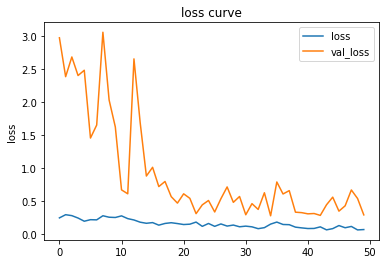

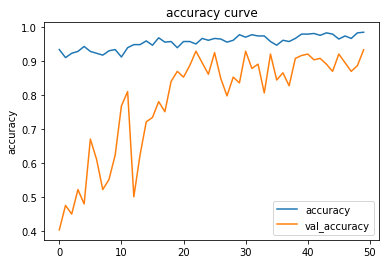

In [22]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [23]:
loss, accuracy = model.evaluate(val_data, val_label)
print('test: ')
print('loss: {}'.format(loss))
print('accuracy: {}'.format(accuracy))

9/9 [==============================] - 3s 158ms/step - loss: 0.3345 - accuracy: 0.9160
test: 
loss: 0.334461510181427
accuracy: 0.9160305261611938


### Plot the confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix
pre=model.predict(val_data)
pre=np.argmax(pre,axis=1)

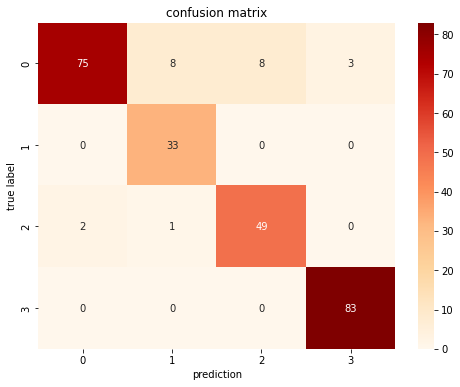

In [25]:
import seaborn as sn
cm=confusion_matrix(pre,np.argmax(val_label,axis=1))
fit=plt.figure(figsize=(8,6))
plt.title('confusion matrix')
sn.heatmap(cm,annot=True,cmap='OrRd',fmt='g')
plt.xlabel('prediction')
plt.ylabel('true label')
plt.show()

# Output the csv file

In [26]:
import pandas as pd

In [27]:
prediction=model.predict(te_data)
prediction=np.argmax(prediction,axis=1)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 1,
       2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0,
       3, 0, 3, 2, 0, 0, 3, 3, 3])

In [28]:
test_label=pd.DataFrame()
test_label['image_id']=te_filename
test_label['labels']=prediction
test_label=test_label.sort_values(by='image_id')
test_label.to_csv('/content/drive/MyDrive/Colab Notebooks/2022cvdl_practice_HW2/2022cvdl_practice_HW2/2022computervision/weather_image/predict_label_v5.csv',index=False) #結果轉csv檔

# Part3: Data augmentation

In [29]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

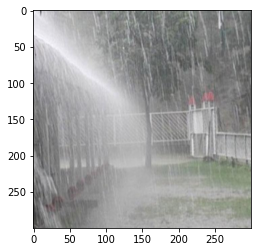

In [30]:
data=tr_data[1]
data=data_augmentation(data)
plt.imshow(data)